#AI Group Project ~ Deep Learning

##Prediction of Pumpkin Seed Type



Dataset ini berisi 2.500 data dan 13 features. Terdapat dua jenis biji labu, yaitu'Urgup_Sivrisi' dan 'Cercevelik' yang umumnya ditanam di daerah Urgup dan Karacaoren di Turki. Project ini dilakukan untuk dapat mengklasifikasi jenis biji labu dengan data-data yang telah ada. Dataset diambil dari link https://www.kaggle.com/datasets/muratkokludataset/pumpkin-seeds-dataset

###Import Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f as F_distribution
from sklearn.model_selection import KFold


# from sklearn import preprocessing
# from sklearn.model_selection import train_test_split
# import random
# from random import seed
# from random import randrange
# from csv import reader
# from math import sqrt
# import csv
# import os
# import seaborn as sns
# import re
# from numpy import random


###Load Dataset

In [ ]:
pumpkin_1 = pd.read_excel('/content/drive/MyDrive/Datasets/Pumpkin_Seeds_Dataset.xlsx')
pumpkin_2 = pd.read_csv('/content/drive/MyDrive/Datasets/5000_Pumpkin_Seeds_GAN_Dataset.csv')

pumpkin_data = pd.concat([pumpkin_1, pumpkin_2])
pumpkin_data.tail(10)

class_map = {'Çerçevelik': 1, 'Ürgüp Sivrisi':2}
pumpkin_data['Class'] = pumpkin_data['Class'].replace(class_map)

df = pumpkin_data[['Area',	'Perimeter',	'Major_Axis_Length',	'Minor_Axis_Length', 'Convex_Area',	'Equiv_Diameter',	'Eccentricity',	'Solidity',	'Extent',	'Roundness',	'Aspect_Ration',	'Compactness',	'Class']]
print(df.shape)
df.tail(10)

(7500, 13)


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
4990,71041,1127.5199,428.02945,274.43870,80258,379.73315,0.596869,0.932685,0.533533,0.765213,2.154492,0.773263,1
4991,53736,1167.8882,390.58655,248.50845,70640,385.97400,0.655005,0.935849,0.575175,0.780027,2.165465,0.807173,0
4992,86582,1127.6531,421.76147,298.69424,86601,362.46667,0.622573,0.936295,0.582196,0.728349,1.659233,0.755153,1
4993,104993,1265.4141,478.35687,287.78998,92970,312.24432,0.656063,0.951647,0.632103,0.681130,1.530717,0.687326,1
4994,55787,1074.8579,420.03342,255.99118,68387,384.42584,0.629468,0.935547,0.535280,0.792258,2.277966,0.761318,1
4995,70415,1155.8036,418.09020,289.29290,76340,370.24243,0.602830,0.930423,0.535034,0.760331,1.810571,0.741103,1
4996,90195,1296.4999,458.21585,276.46655,83805,321.62872,0.651667,0.942690,0.581542,0.687192,1.626000,0.683103,1
4997,72713,1071.2563,479.34576,212.25452,68820,356.39480,0.696356,0.937712,0.605875,0.740397,2.792032,0.737174,0
4998,76544,1172.8456,432.22098,227.43350,75017,349.18420,0.586717,0.944879,0.568123,0.740454,2.236784,0.762664,0
4999,77824,1029.4976,388.96400,248.38828,60308,377.52070,0.737149,0.949102,0.602484,0.744349,2.160608,0.739347,1


###About The Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               7500 non-null   int64  
 1   Perimeter          7500 non-null   float64
 2   Major_Axis_Length  7500 non-null   float64
 3   Minor_Axis_Length  7500 non-null   float64
 4   Convex_Area        7500 non-null   int64  
 5   Equiv_Diameter     7500 non-null   float64
 6   Eccentricity       7500 non-null   float64
 7   Solidity           7500 non-null   float64
 8   Extent             7500 non-null   float64
 9   Roundness          7500 non-null   float64
 10  Aspect_Ration      7500 non-null   float64
 11  Compactness        7500 non-null   float64
 12  Class              7500 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 820.3 KB


###Split Dataset

In [ ]:
X_df = df[['Area',	'Perimeter',	'Major_Axis_Length',	'Minor_Axis_Length', 'Convex_Area',	'Equiv_Diameter',	'Eccentricity',	'Solidity',	'Extent',	'Roundness',	'Aspect_Ration',	'Compactness']]

# Saving features names
X_feature = list(X_df.columns.values)
X_feature

['Area',
 'Perimeter',
 'Major_Axis_Length',
 'Minor_Axis_Length',
 'Convex_Area',
 'Equiv_Diameter',
 'Eccentricity',
 'Solidity',
 'Extent',
 'Roundness',
 'Aspect_Ration',
 'Compactness']

In [ ]:
X = X_df.values
y = df['Class'].values

###ANOVA for Feature Selection

[index  0 ] Area :  189.542594874
[index  1 ] Perimeter :  50.40593002865844
[index  2 ] Major_Axis_Length :  1118.5592865670692
[index  3 ] Minor_Axis_Length :  1211.2010618859217
[index  4 ] Convex_Area :  209.40332257455034
[index  5 ] Equiv_Diameter :  466.32754686138037
[index  6 ] Eccentricity :  2287.4243156169787
[index  7 ] Solidity :  1429.6531679095126
[index  8 ] Extent :  382.08838370863043
[index  9 ] Roundness :  15.102939945956642
[index  10 ] Aspect_Ration :  981.238532055529
[index  11 ] Compactness :  1493.9949908924311


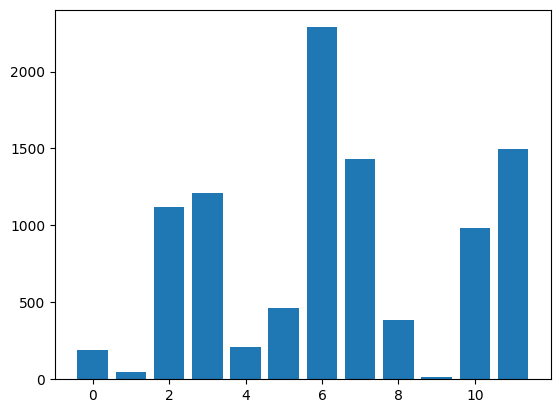

In [ ]:
# ANOVA

# taking f-value
def f_classif_manual(X, y):
    classes = np.unique(y)
    k = 12
    class_means = []
    class_vars = []
    overall_mean = np.mean(X, axis=0)
    SST = np.sum((X - overall_mean) ** 2)

    for c in classes:
        X_c = X[y == c]
        class_means.append(np.mean(X_c, axis=0))
        class_vars.append(np.sum((X_c - class_means[-1]) ** 2))

    SSB = np.sum((class_means - overall_mean) ** 2)
    SSW = np.sum(class_vars)

    MSB = SSB / (len(classes) - 1)
    MSW = SSW / (X.shape[0] - len(classes))

    F = MSB / MSW
    p_value = 1 - F_distribution.cdf(F, len(classes) - 1, X.shape[0] - len(classes))

    return F, p_value

def select_features(X, y):
    num_features = X.shape[1]
    F_values = np.zeros(num_features)
    p_values = np.zeros(num_features)

    for i in range(num_features):
        X_i = np.reshape(X[:, i], (-1, 1))
        F_values[i], p_values[i] = f_classif_manual(X_i, y)

    return F_values, p_values

F_values, p_values = select_features(X, y)

# multiplying f-value with 1000 so the difference between bar in graph is clearer
F_values = F_values*1000

for i in range(len(F_values)):
 print("[index ", i, "]", X_feature[i], ": ", F_values[i])

plt.bar([i for i in range(len(F_values))], F_values)
plt.show()

In [ ]:
#choosing feature (with the index)
X = X[:, [2, 3, 6, 7, 10, 11]]

###Decision Tree

In [ ]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor '''

        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain

        # for leaf node
        self.value = value

class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''

        # initialize the root of the tree
        self.root = None

        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree '''

        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)

        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"],
                            left_subtree, right_subtree, best_split["info_gain"])

        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)

    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''

        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")

        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain

        # return best split
        return best_split

    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''

        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right

    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''

        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain

    def entropy(self, y):
        ''' function to compute entropy '''

        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy

    def gini_index(self, y):
        ''' function to compute gini index '''

        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini

    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''

        Y = list(Y)
        return max(Y, key=Y.count)

    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''

        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)

    def fit(self, X, Y):
        ''' function to train the tree '''

        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)

    def predict(self, X):
        ''' function to predict new dataset '''

        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions

    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''

        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

In [ ]:
from sklearn.model_selection import KFold

# Initialize k-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True)

iteration_accuracy = []
for x in range(5):
# Perform k-fold cross-validation
  accuracy_scores = []

  for train_index, val_index in kf.split(X):
      X_train, X_val = X[train_index], X[val_index]
      y_train, y_val = y[train_index], y[val_index]

      # Ensure the dimensions of X and Y match
      if len(y_train.shape) == 1:
          y_train = y_train.reshape(-1, 1)

      # Create a new instance of the DecisionTreeClassifier
      dt = DecisionTreeClassifier()

      # Train the decision tree on the training set
      dt.fit(X_train, y_train)

      # Make predictions on the validation set
      y_pred = dt.predict(X_val)

      # Calculate the accuracy
      accuracy = np.sum(y_pred == y_val) / len(y_val)
      accuracy_scores.append(accuracy)

  # Calculate the average accuracy across all folds
  average_accuracy = np.mean(accuracy_scores)

  # Print the average accuracy
  print(f"Average Accuracy run[{x}]: {average_accuracy}")

  iteration_accuracy.append(average_accuracy)

print("Average Accuracy:", np.mean(iteration_accuracy))



Average Accuracy run[0]: 0.8234666666666666
Average Accuracy run[1]: 0.8205333333333333
Average Accuracy run[2]: 0.8178666666666666
Average Accuracy run[3]: 0.8216000000000001
Average Accuracy run[4]: 0.8249333333333333
Average Accuracy: 0.82168


In [ ]:
# Accuracy sebelum Feature Selection dan Data Augmentation

# DOCUMENTATION result on June 14th 2:23 PM execution time: 34m 15s
# Average Accuracy run[0]: 0.8708
# Average Accuracy run[1]: 0.8696
# Average Accuracy run[2]: 0.8696
# Average Accuracy run[3]: 0.8712
# Average Accuracy run[4]: 0.8704
# Average Total: 0.8703199999999999

In [12]:
# Documentation result on Jun 14 2023, 5.34 PM, execution time 3h 30m 37s
# After Feature Selection and Data Augmentation

# Average Accuracy run[0]: 0.8234666666666666
# Average Accuracy run[1]: 0.8205333333333333
# Average Accuracy run[2]: 0.8178666666666666
# Average Accuracy run[3]: 0.8216000000000001
# Average Accuracy run[4]: 0.8249333333333333
# Average Accuracy: 0.82168/

In [13]:
# HYPOTHESIS TESTING
# H0: accuracy setelah GAN dan feature selection >= accuracy sebelum GAN dan feature selection
# H1: accuracy setelah GAN dan feature selection < accuracy sebelum GAN dan feature selection
# Hypothesis testing menggunakan metode statistik dengan t-test.
# significant level yang digunakan adalah .05

import scipy.stats as stats

results = {
    'Before':[0.8708, 0.8696, 0.8696, 0.8712, 0.8704],
    'After': [0.82347, 0.82053, 0.81787, 0.8216, 0.82493],
}
t_statistics, p_value = stats.ttest_ind(results['Before'], results['After'])

if p_value < 0.05:
    print("Reject H0: result after GAN and feature selection has significantly lesser accuracy than before after GAN and feature selection.")
else:
    print("Fail to reject H0: result after GAN and feature selection has greater or equal accuracy compared to result before GAN and feature selection.")
print(p_value)

Reject H0: result after GAN and feature selection has significantly lesser accuracy than before after GAN and feature selection.
2.2020354905860127e-10


In [13]:
'p;-'